In [12]:
import pandas as pd

In [69]:
# topic = 'stat_textbook'
topic = 'GraphRAG'
df = pd.read_csv(f'../test_results/{topic}/evaluate.csv')
# df = df[:20]
df.head()

,Question,Comprehensiveness,Diversity,Empowerment,Directness
0,- How does Graph RAG enhance the capabilities ...,0,0,0,0
1,- What are the unique capabilities of Graph RA...,1,1,1,1
2,- In what ways does Graph RAG use a self-gener...,0,0,0,0
3,- How does Graph RAG demonstrate scalability a...,1,1,1,1
4,- What is the relationship between Graph RAG a...,Tie,Tie,1,Tie


In [47]:
def get_win_rate(df):  
  # Counting occurrences
    evaluation_columns =  ['Comprehensiveness', 'Diversity', 'Empowerment', 'Directness']

    num_questions = df.shape[0]
    # Initialize a dictionary to hold the value counts
    counts_dict = {col: df[col].value_counts()/num_questions for col in evaluation_columns}

    # Convert the dictionary of Series into a DataFrame
    value_rate_df = pd.DataFrame(counts_dict)

    # Replace NaN with 0 to indicate no occurrences of that category in some columns
    value_rate_df.fillna(0, inplace=True)

    value_rate_df['total'] = value_rate_df[evaluation_columns].mean(axis=1)

    return value_rate_df


In [65]:
value_counts_df = get_win_rate(df)
value_counts_df.to_csv(f'../test_results/{topic}/eval_statistics.csv', index=False, encoding='utf-8')
value_counts_df

,Comprehensiveness,Diversity,Empowerment,Directness,total
0,0.464286,0.482143,0.553571,0.285714,0.446429
1,0.321429,0.303571,0.375000,0.428571,0.357143
Tie,0.214286,0.214286,0.071429,0.285714,0.196429


## histogram of result statistics

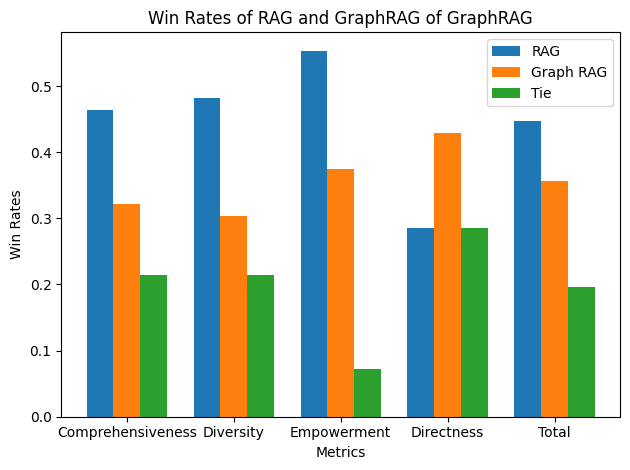

In [66]:
import matplotlib.pyplot as plt
import numpy as np


metrics = ['Comprehensiveness', 'Diversity', 'Empowerment', 'Directness', 'Total']
rag_wins = value_counts_df.iloc[0]
graph_rag_wins = value_counts_df.iloc[1]
ties = value_counts_df.iloc[2]

x = np.arange(len(metrics))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, rag_wins, width, label='RAG')
rects2 = ax.bar(x, graph_rag_wins, width, label='Graph RAG')
rects3 = ax.bar(x + width, ties, width, label='Tie')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Win Rates')
ax.set_title(f'Win Rates of RAG and GraphRAG of {topic}')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
# ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()


### statistics with different cognitive demands

In [23]:
cat_df = pd.read_csv('../test_results/GraphRAG/questions_cat.csv')
cat_df.head(10)

,Question,Global_understanding,Reasoning_capabilities,Deep_contextual_understanding,Question_type
0,How does Graph RAG enhance the capabilities of...,True,True,True,reasoning
1,What are the unique capabilities of Graph RAG ...,True,True,True,reasoning
2,In what ways does Graph RAG use a self-generat...,True,True,True,explanatory
3,How does Graph RAG demonstrate scalability adv...,True,True,True,reasoning
4,What is the relationship between Graph RAG and...,True,True,True,reasoning
5,How does Graph RAG's federated retrieval-gener...,True,True,True,explanatory
6,What are the similarities between Graph RAG an...,True,True,True,reasoning
7,How does Graph RAG compare to multi-hop questi...,True,True,True,reasoning
8,What is the process involved in the Graph RAG ...,True,False,True,explanatory
9,How does the Indexer in Graph RAG process and ...,False,False,True,explanatory


In [18]:
df_true = df[(cat_df['Global_understanding'] == True) & (cat_df['Reasoning_capabilities'] == True)]
true_rate_df = get_win_rate(df_true)
print('num of records: ' + str(df_true.shape[0]))
print(true_rate_df)


num of records: 35
     Comprehensiveness  Diversity  Empowerment  Directness     total
0             0.600000   0.571429     0.685714    0.257143  0.528571
1             0.285714   0.314286     0.314286    0.371429  0.321429
Tie           0.114286   0.114286     0.000000    0.371429  0.150000


In [19]:
df_false = df[(cat_df['Global_understanding'] == False) & (cat_df['Reasoning_capabilities'] == False)]
false_rate_df = get_win_rate(df_false)
print('num of records: ' + str(df_false.shape[0]))
print(false_rate_df)

num of records: 16
     Comprehensiveness  Diversity  Empowerment  Directness     total
0               0.4375     0.5000       0.6250      0.3750  0.484375
1               0.1875     0.1875       0.1875      0.4375  0.250000
Tie             0.3750     0.3125       0.1875      0.1875  0.265625


In [20]:
question_types = ['reasoning', 'explanatory', 'factual']

for type in question_types:
    type_df = df[cat_df['Question_type'] == type]
    rate_df = get_win_rate(type_df)
    print(type)
    print('num of records: ' + str(type_df.shape[0]))
    print(rate_df)
    print()
    

reasoning
num of records: 19
     Comprehensiveness  Diversity  Empowerment  Directness     total
0             0.421053   0.526316     0.526316    0.263158  0.434211
1             0.421053   0.421053     0.473684    0.368421  0.421053
Tie           0.157895   0.052632     0.000000    0.368421  0.144737

explanatory
num of records: 34
     Comprehensiveness  Diversity  Empowerment  Directness     total
0             0.676471   0.529412     0.764706    0.382353  0.588235
1             0.117647   0.235294     0.117647    0.382353  0.213235
Tie           0.205882   0.235294     0.117647    0.235294  0.198529

factual
num of records: 3
     Comprehensiveness  Diversity  Empowerment  Directness     total
0             0.000000   0.333333     0.333333    0.000000  0.166667
1             0.333333   0.000000     0.333333    0.666667  0.333333
Tie           0.666667   0.666667     0.333333    0.333333  0.500000



### Tokens used

In [36]:
from transformers import BertTokenizer

def count_tokens(text):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    tokens = tokenizer.tokenize(text)
    return len(tokens)



In [51]:
df_rag = pd.read_csv(f'../test_results/{topic}/RAG_result.csv')
num_tokens = df_rag['RAG Answer'].apply(count_tokens)
print("average tokens in RAG response: " + str(num_tokens.mean()))

average tokens in RAG response: 1289.62


In [45]:
df_graph_rag = pd.read_csv(f'../test_results/{topic}/GraphRAG_results.csv')
num_tokens = df_graph_rag['Graph RAG answer'].apply(count_tokens)
print("average tokens in Graph RAG response: " + str(num_tokens.mean()))

average tokens in Grpah RAG response: 743.6071428571429
